In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import layers, Model
from tensorflow.keras.utils import plot_model

In [3]:
def building_le_net_5(input_shape = (32,32,1), num_classes=10, activation_function = 'relu'):
    inputs = layers.Input(shape=(32,32,1))

    # Block 1 : 
    x = layers.Conv2D(filters=6, kernel_size=(5,5), strides=1, use_bias = False, padding='valid', name='conv1')(inputs)
    x = layers.BatchNormalization(name='BatchNorm1')(x)
    x = layers.Activation('relu', name='relu1')(x)
    x = layers.MaxPooling2D(pool_size=2, strides=2, name='pool1')(x)

    # Block 2 : 
    x = layers.Conv2D(filters=16, kernel_size=(5,5), strides=1, use_bias = False, padding='valid', name='conv2')(x)
    x = layers.BatchNormalization(name='BatchNorm2')(x)
    x = layers.Activation('relu', name='relu2')(x)
    x = layers.MaxPooling2D(pool_size=2, strides=2, name='pool2')(x)

    # Dense Block 1 : 
    x = layers.Flatten(name='flatten')(x)
    
    x = layers.Dense(units=120, use_bias=False, name='dense_120')(x)
    x = layers.BatchNormalization(name='BatchNorm3')(x)
    x = layers.ReLU(name='relu3') (x)

    # Dense Block 2 : 
    x = layers.Dense(units=84, use_bias=False, name='dense_84')(x)
    x = layers.BatchNormalization(name='BatchNorm4')(x)
    x = layers.ReLU(name='relu4') (x)

    # Output Layer : 
    outputs = layers.Dense(units=num_classes, activation='softmax', name='Output')(x)
    
    return Model(inputs,outputs,name="LeNet5_Modern")

In [4]:
model = building_le_net_5()
model

2026-02-20 16:17:03.759391: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2026-02-20 16:17:03.759419: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2026-02-20 16:17:03.759425: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
I0000 00:00:1771566423.759438  564445 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1771566423.759458  564445 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<Functional name=LeNet5_Modern, built=True>

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [6]:
model.summary()

Model: "LeNet5_Modern"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 28, 28, 6)      │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm1 (BatchNormalization) │ (None, 28, 28, 6)      │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1 (Activation)              │ (None, 28, 28, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 10, 10, 16)     │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm2 (BatchNormalization) │ (None, 10, 10, 16)     │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2 (Activation)              │ (None, 10, 10, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 120)            │        48,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm3 (BatchNormalization) │ (None, 120)            │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3 (ReLU)                    │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 84)             │        10,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm4 (BatchNormalization) │ (None, 84)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu4 (ReLU)                    │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,384 (243.69 KB)

 Trainable params: 61,932 (241.92 KB)

 Non-trainable params: 452 (1.77 KB)

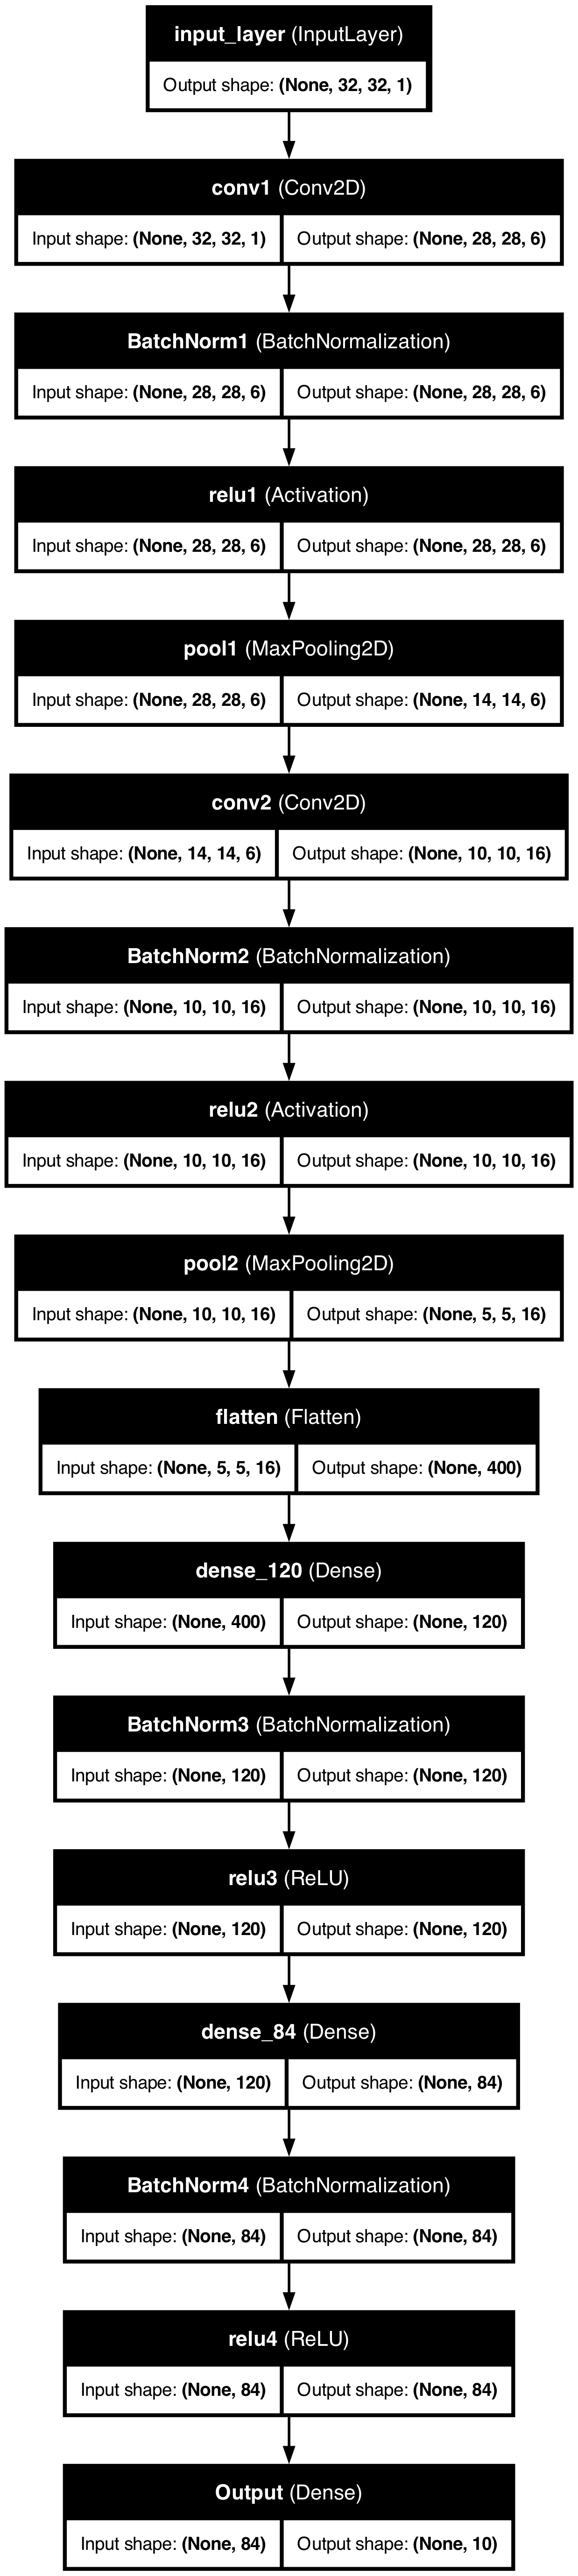

In [7]:
plot_model(model, to_file="model1.png",show_layer_names=True,show_shapes=True, rankdir='TB')